In [33]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import pandas as pd

In [135]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = pd.read_csv(r'C:\Users\ASUS\Desktop\sales-of-shampoo.csv', header=0,parse_dates=[0], date_parser=parser)
series.head()






,Month,Sales
0,1901-01-01,266.0
1,1901-02-01,145.9
2,1901-03-01,183.1
3,1901-04-01,119.3
4,1901-05-01,180.3


In [136]:
series.Month = pd.to_datetime(series.Month)

In [137]:
print(series.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
Month    36 non-null datetime64[ns]
Sales    36 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 656.0 bytes
None


In [93]:
df=pd.DataFrame(series)

In [140]:
series.head()

,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


In [ ]:
series.to

In [139]:
series.set_index('Month',inplace=True)

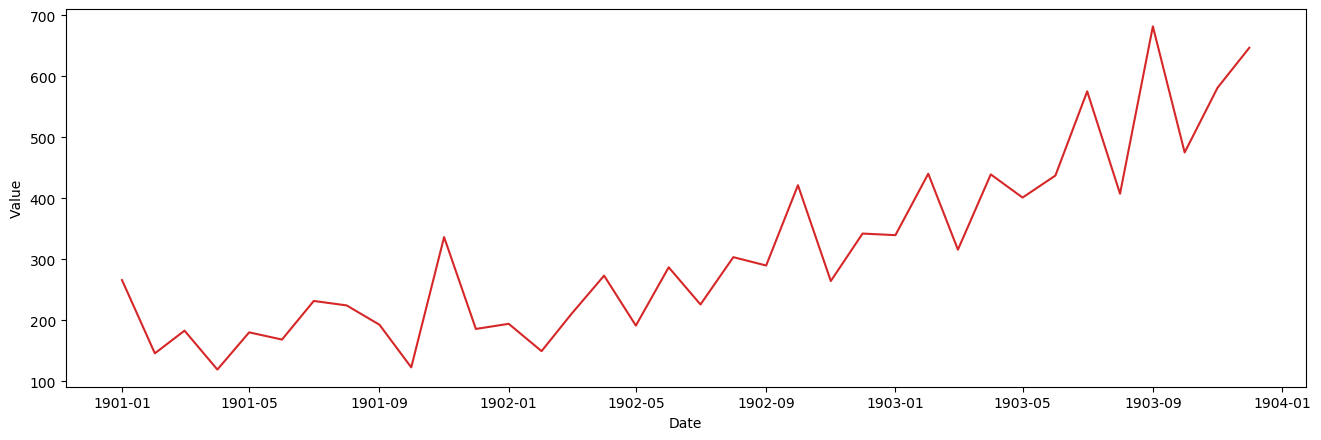

In [141]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=series.index, y=series.values)    

In [98]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("It is stationary")
    else:
        print("It is non-stationary ")

In [142]:
adfuller_test(series['Sales'])

ADF Test Statistic : 3.0601420836411806
p-value : 1.0
#Lags Used : 10
Number of Observations Used : 25
It is non-stationary 


## Getting 'd' value

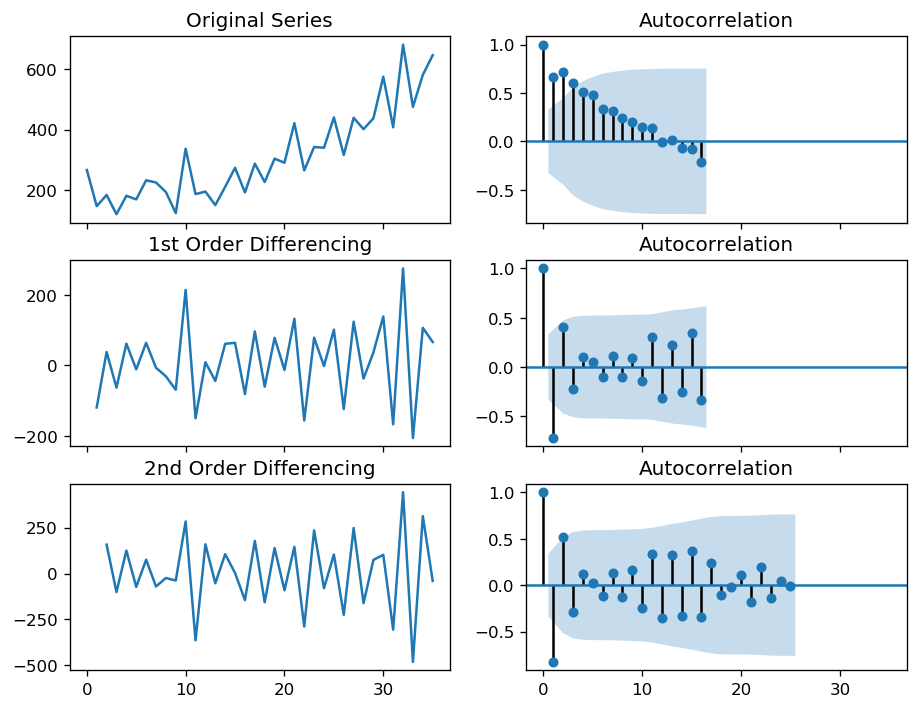

In [201]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(series.values); axes[0, 0].set_title('Original Series')
plot_acf(series.values, ax=axes[0, 1])


# 1st Differencing
axes[1, 0].plot(series.diff().values); axes[1, 0].set_title('1st Order Differencing')
plot_acf(series.diff().dropna().values, ax=axes[1, 1])


# 2nd Differencing
axes[2, 0].plot(series.diff().diff().values); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(series.diff().diff().dropna().values,lags=25, ax=axes[2, 1])


plt.show()



## Getting 'p' Value

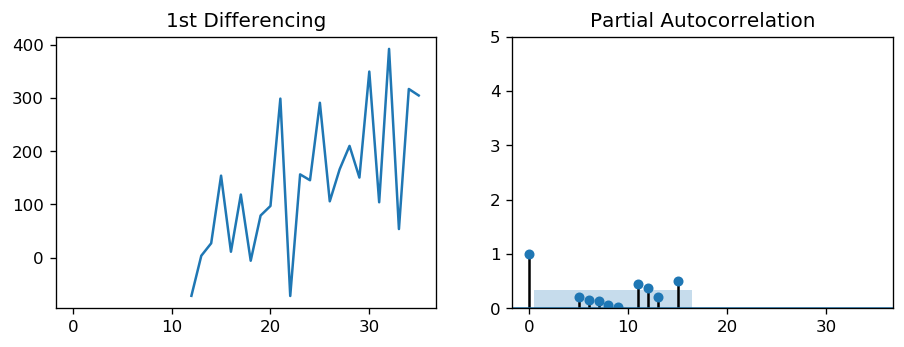

In [208]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(series.diff(12).values); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(series.diff().dropna().values, ax=axes[1])

plt.show()

## Getting 'q' Value

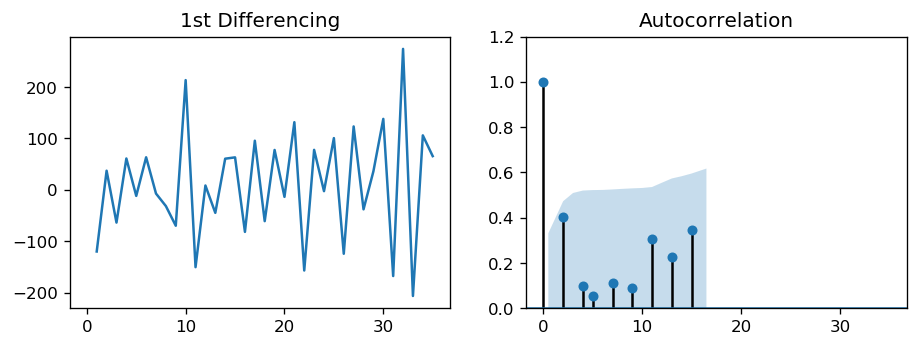

In [210]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(series.diff().values); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(series.diff().dropna().values, ax=axes[1])

plt.show()

## Model fitting with p=5, d=1, q=0

In [226]:
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Thu, 30 Apr 2020   AIC                            406.340
Time:                        23:23:40   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.003       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     

## Residual Error

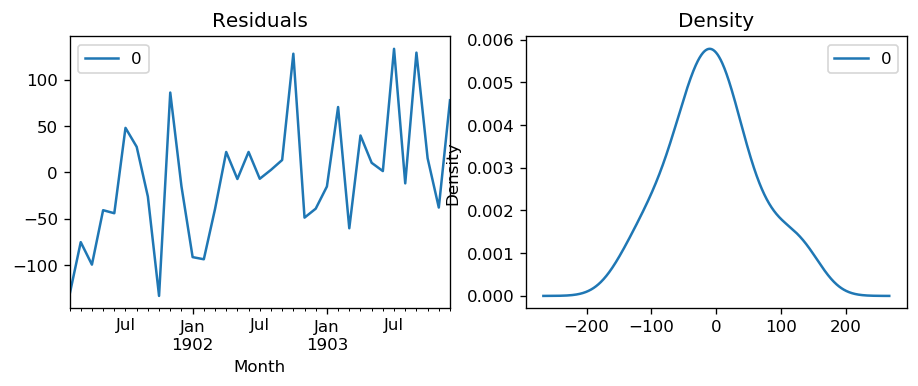

In [227]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

## Fitted Line vs. Actual Line

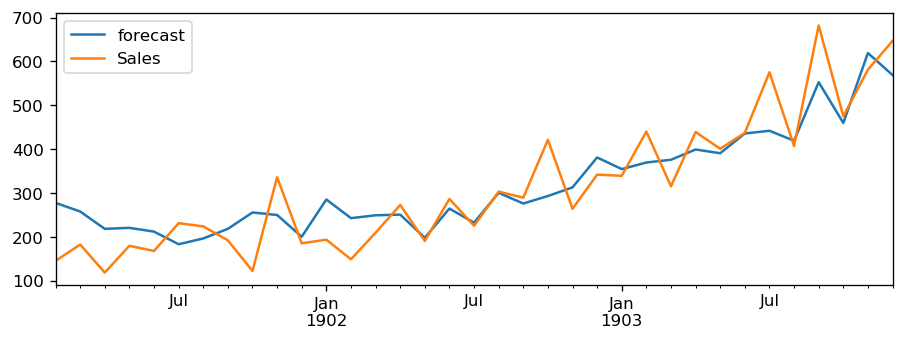

In [228]:
model_fit.plot_predict(dynamic=False)
plt.show()

## Calculating MSE

In [229]:
X = series.values

size = int(len(X) * 0.66)

train, test = X[0:size], X[size:len(X)]

history = [x for x in train]

predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=349.117793, expected=342.300000
predicted=306.512947, expected=339.700000
predicted=387.376475, expected=440.400000
predicted=348.154206, expected=315.900000
predicted=386.308816, expected=439.300000
predicted=356.082003, expected=401.300000
predicted=446.379451, expected=437.400000
predicted=394.737308, expected=575.500000
predicted=434.915490, expected=407.600000
predicted=507.923462, expected=682.000000
predicted=435.482756, expected=475.300000
predicted=652.743802, expected=581.300000
predicted=546.343484, expected=646.900000
Test MSE: 6958.325


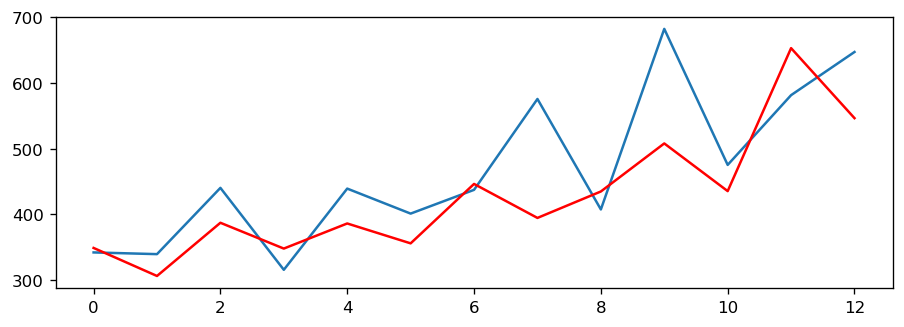

In [230]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()